In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
# loading related packaes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# loading related dataset
churn = pd.read_excel('../churn.xlsx')

# Displaying the first five rows of the dataset
churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
churn.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [4]:
# Keep relatively necessary columns so that drop the others and droping the column with 5174 missing values.
churn.drop(columns=['Churn Reason','CustomerID','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Tenure Months','Payment Method','Internet Service','Contract'], inplace=True)

In [5]:
churn.head()

,Count,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,Male,No,No,No,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,1,86,3239
1,1,Female,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,1,67,2701
2,1,Female,No,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.65,820.5,Yes,1,86,5372
3,1,Female,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,Yes,1,84,5003
4,1,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.70,5036.3,Yes,1,89,5340


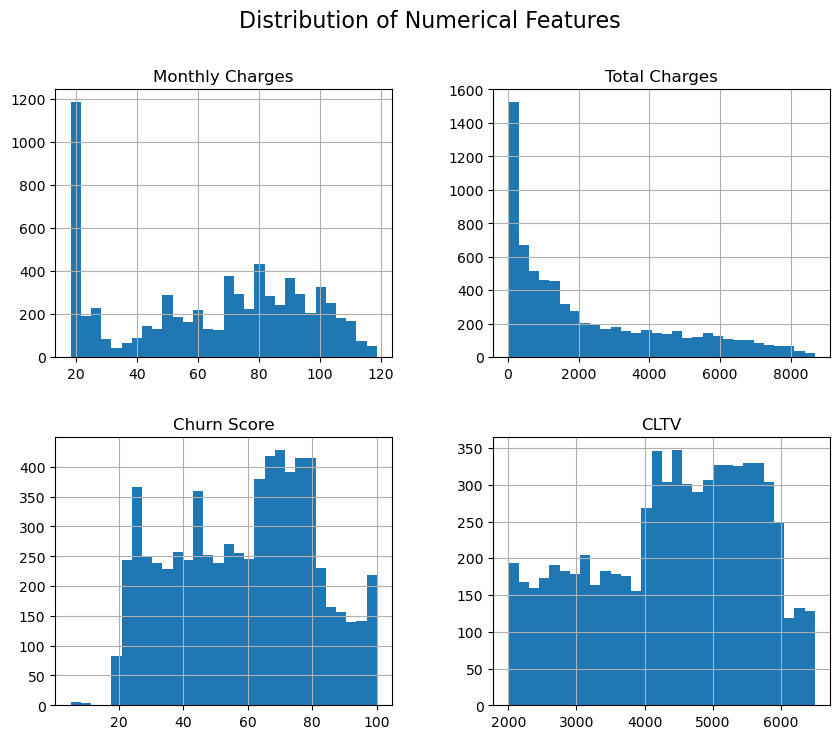

In [6]:
churn['Total Charges'] = pd.to_numeric(churn['Total Charges'], errors='coerce')
numerical_columns = ['Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

churn[numerical_columns].hist(bins=30, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Distribution of Numerical Features", fontsize=16);

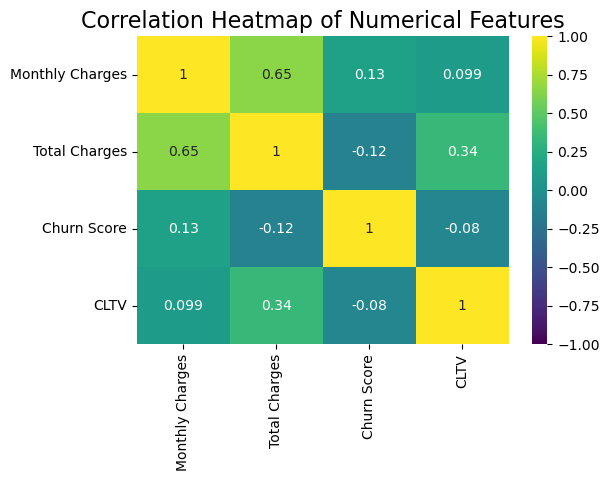

In [7]:
plt.figure(figsize=(6, 4))
corr_matrix = churn[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16);

In [12]:
churn=churn.dropna()

### Logistic Regression

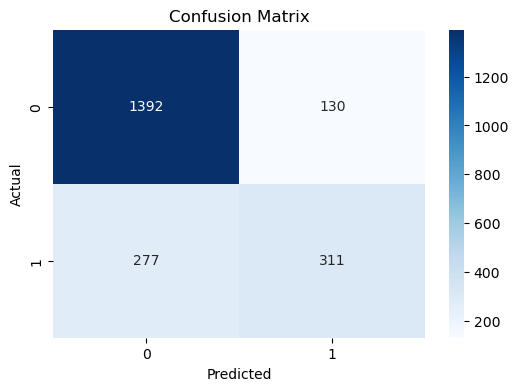

In [13]:
# Preparing the dataset
X = churn[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
           'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection',
           'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 
           'Monthly Charges', 'Total Charges']]

y = churn['Churn Value']

# Converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and train the Logistic Regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the model
y_pred = logreg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual');


In [14]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1522
           1       0.71      0.53      0.60       588

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



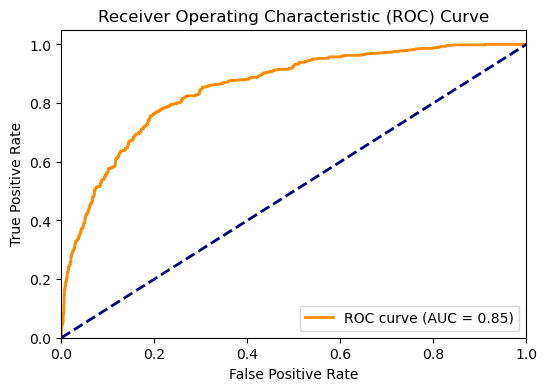

In [15]:
# Compute ROC Curve and AUC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right");


In [16]:
# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

AUC Score: 0.85


#### An AUC score of 0.85 indicates that Logistic Regression model has a reasonably good performance.

### Decision Tree Classifier

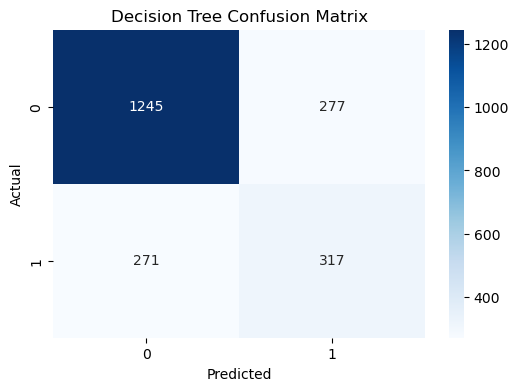

In [17]:
# Instantiate the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict using the Decision Tree model
y_pred_dtree = dtree.predict(X_test)

# Confusion Matrix
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [18]:
# Print Classification Report
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dtree))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1522
           1       0.53      0.54      0.54       588

    accuracy                           0.74      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.74      0.74      0.74      2110



In [19]:
# Compute ROC Curve and AUC for Decision Tree
y_pred_prob_dtree = dtree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_pred_prob_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

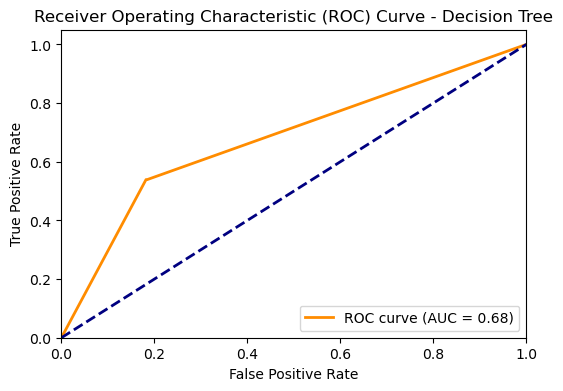

In [20]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_dtree, tpr_dtree, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right");

In [21]:
# Print AUC score
print(f'AUC Score - Decision Tree: {roc_auc_dtree:.2f}')

AUC Score - Decision Tree: 0.68


#### An AUC score of 0.68 for the Decision Tree Classifier indicates a slightly lower performance compared to the 0.85 AUC score from the Logistic Regression model.

### Random Forest

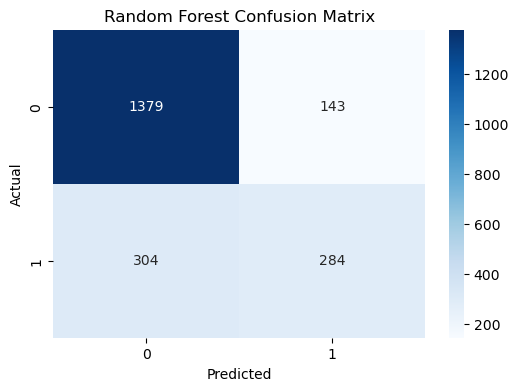

In [22]:
# Instantiate the Random Forest model
rforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest
rforest.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rforest = rforest.predict(X_test)

# Confusion Matrix for Random Forest
conf_matrix_rforest = confusion_matrix(y_test, y_pred_rforest)

# Plotting the Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rforest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [23]:
# Print Classification Report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rforest))

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1522
           1       0.67      0.48      0.56       588

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [24]:
# Compute ROC Curve and AUC for Random Forest
y_pred_prob_rforest = rforest.predict_proba(X_test)[:, 1]
fpr_rforest, tpr_rforest, thresholds_rforest = roc_curve(y_test, y_pred_prob_rforest)
roc_auc_rforest = auc(fpr_rforest, tpr_rforest)

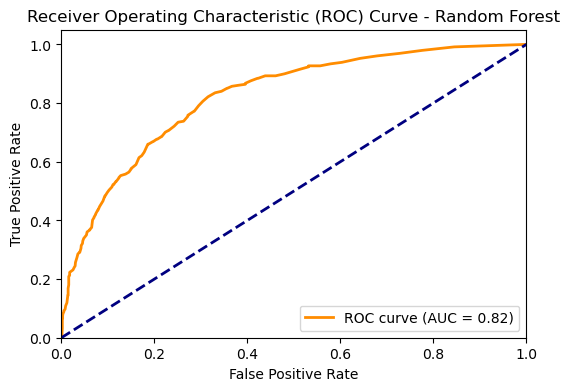

In [25]:
# Plot ROC Curve for Random Forest
plt.figure(figsize=(6, 4))
plt.plot(fpr_rforest, tpr_rforest, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rforest:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right");

In [26]:
# Print AUC score for Random Forest
print(f'AUC Score - Random Forest: {roc_auc_rforest:.2f}')

AUC Score - Random Forest: 0.82


#### An AUC score of 0.82 for the Random Forest Classifier indicates that it performs better than the Decision Tree (0.68) model but less than the Logistic Regression (0.85).

#### Hyperparameter Tuning

In [28]:
# Define the parameter grid for tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30, None],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Instantiate the Random Forest Classifier
rforest = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found by GridSearchCV:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


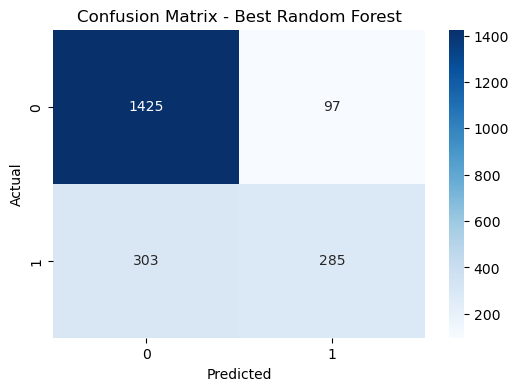

In [29]:
# Get the best estimator (model) after GridSearchCV
best_rforest = grid_search.best_estimator_

# Predict using the best Random Forest model
y_pred_best_rforest = best_rforest.predict(X_test)

# Confusion Matrix for the best Random Forest model
conf_matrix_best_rforest = confusion_matrix(y_test, y_pred_best_rforest)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rforest, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [31]:
# Compute ROC Curve and AUC for the best Random Forest model
y_pred_prob_best_rforest = best_rforest.predict_proba(X_test)[:, 1]
fpr_best_rforest, tpr_best_rforest, thresholds_best_rforest = roc_curve(y_test, y_pred_prob_best_rforest)
roc_auc_best_rforest = auc(fpr_best_rforest, tpr_best_rforest)

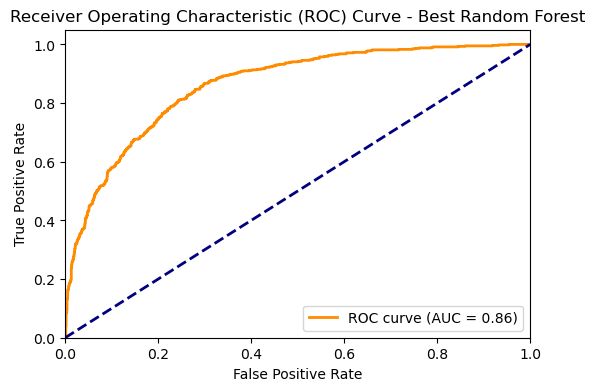

In [33]:
# Plot ROC Curve for the best Random Forest model
plt.figure(figsize=(6, 4))
plt.plot(fpr_best_rforest, tpr_best_rforest, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_best_rforest:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Random Forest')
plt.legend(loc="lower right");

In [34]:
# Print AUC score for the best Random Forest model
print(f'AUC Score - Best Random Forest: {roc_auc_best_rforest:.2f}')

AUC Score - Best Random Forest: 0.86


#### An AUC score of 0.86 for the Best Random Forest model indicates that after hyperparameter tuning, the Random Forest model now slightly outperforms the Logistic Regression model (AUC: 0.85).

### Cross-Validation

In [35]:
# Logistic Regression Cross-Validation
logreg = LogisticRegression(max_iter=300)

# Perform 5-fold cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("Logistic Regression Cross-validation AUC scores for each fold:", logreg_cv_scores)
print("Mean AUC score from Logistic Regression cross-validation:", logreg_cv_scores.mean())


Logistic Regression Cross-validation AUC scores for each fold: [0.83219919 0.85669562 0.83288122 0.83346806 0.82386344]
Mean AUC score from Logistic Regression cross-validation: 0.8358215081819325


In [36]:
# Best Random Forest Cross-Validation (with hyperparameters from GridSearchCV)
best_rforest_params = {
    'n_estimators': 300,       
    'max_depth': 20,          
    'min_samples_split': 5,    
    'min_samples_leaf': 2,    
    'bootstrap': True          
}

In [37]:
# Instantiate Random Forest with best parameters
best_rforest = RandomForestClassifier(**best_rforest_params, random_state=42)

# Perform 5-fold cross-validation for Best Random Forest
rforest_cv_scores = cross_val_score(best_rforest, X, y, cv=5, scoring='roc_auc')
print("Best Random Forest Cross-validation AUC scores for each fold:", rforest_cv_scores)
print("Mean AUC score from Best Random Forest cross-validation:", rforest_cv_scores.mean())

Best Random Forest Cross-validation AUC scores for each fold: [0.81650843 0.85465986 0.82419397 0.83337867 0.83390733]
Mean AUC score from Best Random Forest cross-validation: 0.8325296542669453


#### This confirms that the Best Random Forest model is performing well consistently, though still slightly below the single test AUC of 0.86 that was obtained earlier after hyperparameter tuning.

In [38]:
# Logistic Regression Cross-Validation
logreg = LogisticRegression(max_iter=300)

# Perform 5-fold cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("Logistic Regression Cross-validation AUC scores for each fold:", logreg_cv_scores)
print("Mean AUC score from Logistic Regression cross-validation:", logreg_cv_scores.mean())

Logistic Regression Cross-validation AUC scores for each fold: [0.83219919 0.85669562 0.83288122 0.83346806 0.82386344]
Mean AUC score from Logistic Regression cross-validation: 0.8358215081819325


#### Logistic Regression has a slightly higher cross-validation mean AUC than Random Forest (0.8358 vs. 0.8325), suggesting it might be more consistent overall.

### New Predictions with Logistic Regression

In [39]:
# Final model: Logistic Regression (fitting it to the entire dataset)
logreg_final = LogisticRegression(max_iter=300)

# Fit the model to the entire dataset
logreg_final.fit(X, y)


# Example:
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Senior Citizen': ['No'],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'Phone Service': ['Yes'],
    'Multiple Lines': ['No'],
    'Online Security': ['Yes'],
    'Online Backup': ['No'],
    'Device Protection': ['Yes'],
    'Tech Support': ['Yes'],
    'Streaming TV': ['Yes'],
    'Streaming Movies': ['Yes'],
    'Paperless Billing': ['Yes'],
    'Monthly Charges': [70.0],
    'Total Charges': [800.0]
})

# Convert categorical variables into dummy/indicator variables
new_data = pd.get_dummies(new_data, drop_first=True)

# Ensure the new data has the same feature columns as the model
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0

new_data = new_data[X.columns]  # Ensure same order of columns

# Make predictions for the new data
new_pred = logreg_final.predict(new_data)

# Predict the probability of churn
new_pred_prob = logreg_final.predict_proba(new_data)[:, 1]

print(f"Prediction (0 = No Churn, 1 = Churn): {new_pred[0]}")
print(f"Probability of Churn: {new_pred_prob[0]:.2f}")


Prediction (0 = No Churn, 1 = Churn): 1
Probability of Churn: 0.79


#### The model is confident that this customer is likely to churn, with a high probability (79%)